# **Project Name**    - Paisabazaar banking Fraud Analysis

# **Project Summary -**

For this project, the goal was to analyze customer data from Paisabazaar to uncover patterns and potential red flags that might indicate banking fraud. The dataset included 100,000 records with 28 different attributes, covering key details about customers' financial habits, credit history, and loan information. Some of the important features examined were Age, SSN, Occupation, Annual Income, Credit Utilization Ratio, Payment Behavior, and Credit Score. By studying these factors, we aimed to gain deeper insights into customer behavior and identify any irregularities that could suggest fraudulent activity.

**Key Aspects of the Analysis:**
**Data Wrangling:** Since raw data often contains errors or inconsistencies, we began by cleaning and organizing the dataset. This included handling missing values, fixing incorrect data types, and ensuring uniformity across different columns.

**Exploratory Data Analysis (EDA):** We used various visualization techniques to understand the relationships between different features, spot trends, and get a better sense of the overall data structure.

**Feature Engineering:** To enhance our analysis, we created new variables and modified existing ones to make fraud detection more effective. This helped us capture subtle patterns that might not be obvious in raw data.

## **GitHub Link -**

https://github.com/Raghuram94-msd/Paisa-Bazaar-ML/upload/main

## **Problem Statement**


Given a dataset of 100,000 banking customers with detailed information about their financial activities, credit history, and personal profiles, how can we effectively analyze this data to detect and flag potential fraudulent behavior? The analysis should focus on identifying patterns and anomalies that deviate from typical customer behavior, which could indicate fraudulent activities such as credit card fraud, loan exploitation, or unusual financial transactions.

## ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [16]:
# Load Dataset
df = pd.read_csv(r"E:\ML internship\Paisabazaar project\dataset-2.csv")

### Dataset First View

In [17]:
# Dataset First Look
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [18]:
# Dataset Rows & Columns count
df.shape

(100000, 28)

### Dataset Information

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [20]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [21]:
# Missing Values/Null Values Count
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

#### Converting categorical variable to numerical variable

In [22]:
df['Credit_Score'].replace(['Poor','Good' ,'Standard'],
                        [0,1,2], inplace=True)

### What did you know about your dataset?

# Dataset Overview

**Total Entries (Rows):** 100,000 (RangeIndex: 0 to 99,999)

**Total Columns:** 28 columns with a variety of data types, including numerical, categorical, and string types.


# Key Insights and Observations:
**Diverse Financial Information:** The dataset contains a wide range of financial data, including income, loans, debt, credit inquiries, and payment behavior, which will be crucial for fraud analysis.

**Fraud Indicators:** Columns such as 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Changed_Credit_Limit', and 'Payment_Behaviour' could be strong indicators of risky or fraudulent behavior.

**Categorical Data:** Several columns are categorical (e.g., 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score'). These need to be encoded (e.g., using one-hot encoding or label encoding) if used in machine learning models.

**Potential Redundancies:** Some columns may have closely related or redundant information. For example, 'Annual_Income' and 'Monthly_Inhand_Salary' are related. Also, 'Num_of_Loan' and 'Type_of_Loan' might be correlated.

**Credit Score Insights:** The 'Credit_Score' column is a crucial feature, possibly reflecting the risk of a customer being involved in fraudulent activities.

**Customer Profile Analysis:** Using columns like 'Age', 'Occupation', 'Annual_Income', and 'Credit_History_Age', we can build detailed profiles of customers, which can help in detecting anomalies or fraudulent patterns.

**Data Quality**: There is no indication of missing values (based on the column descriptions), but data types need attention. For instance, 'SSN' should be a string, and certain numerical columns might contain outliers that need handling.

# Areas for Further Analysis:

**Feature Engineering:** Create new features such as 'Debt-to-Income Ratio' (Outstanding Debt/Annual Income) and 'Credit Usage Ratio' (Credit Utilization Ratio/Credit Limit) to better understand customer financial health.

**Fraud Detection:** Focus on the behavior-related columns (e.g., 'Payment_of_Min_Amount', 'Payment_Behaviour') to predict and detect potentially fraudulent customers.

## ***2. Understanding Your Variables***


In [23]:
# Dataset Columns
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [24]:
# Dataset Describe
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586,1.241760
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719,0.873659
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,0.000000
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983,0.000000
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366,2.000000
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683,2.000000
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696,2.000000


### Check Unique Values for each variable.

In [25]:
# Check Unique Values for each variable.
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          2860
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio     99998
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98492
Credit_Score                     3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Example columns (replace 'YourColumnName' with actual column names)
# Fill missing values with default values for specific columns
df.fillna({
    'Age': df['Age'].median(),
    'Annual_Income': df['Annual_Income'].median()
}, inplace=True)

# Drop rows where specific columns have NaN
# Replace 'YourColumnName' with actual column names that you want to check
df.dropna(subset=['Age', 'Annual_Income'], inplace=True)

# Check if any missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())

# Save the cleaned DataFrame
df.to_csv('cleaned_data.csv', index=False)


Missing values in each column:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Missing values after handling:
ID                          0
Customer_ID                 0
Month                   

In [27]:
# Example: Creating a new feature 'Income_per_Account'
df['Income_per_Account'] = df['Annual_Income'] / df['Num_Bank_Accounts']

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']] = scaler.fit_transform(
    df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']])



In [15]:
from sklearn.model_selection import train_test_split

X = df[['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt']]  # Example features
y = df['Credit_Score']  # Example target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Visualize the distribution of Annual_Income


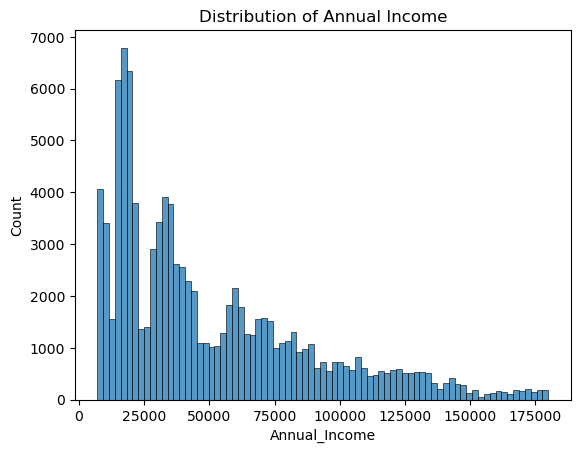

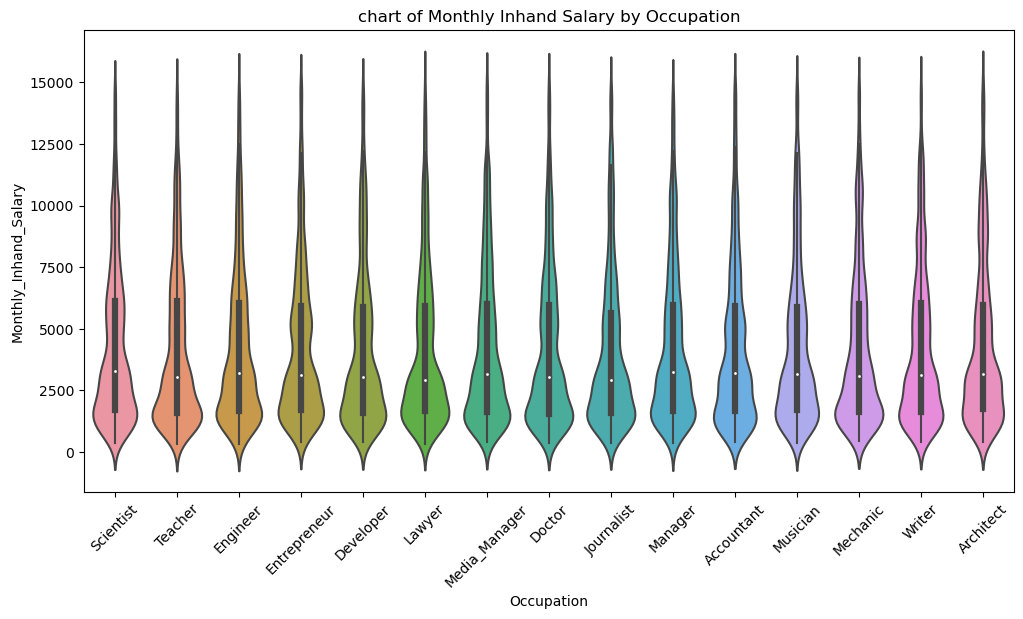

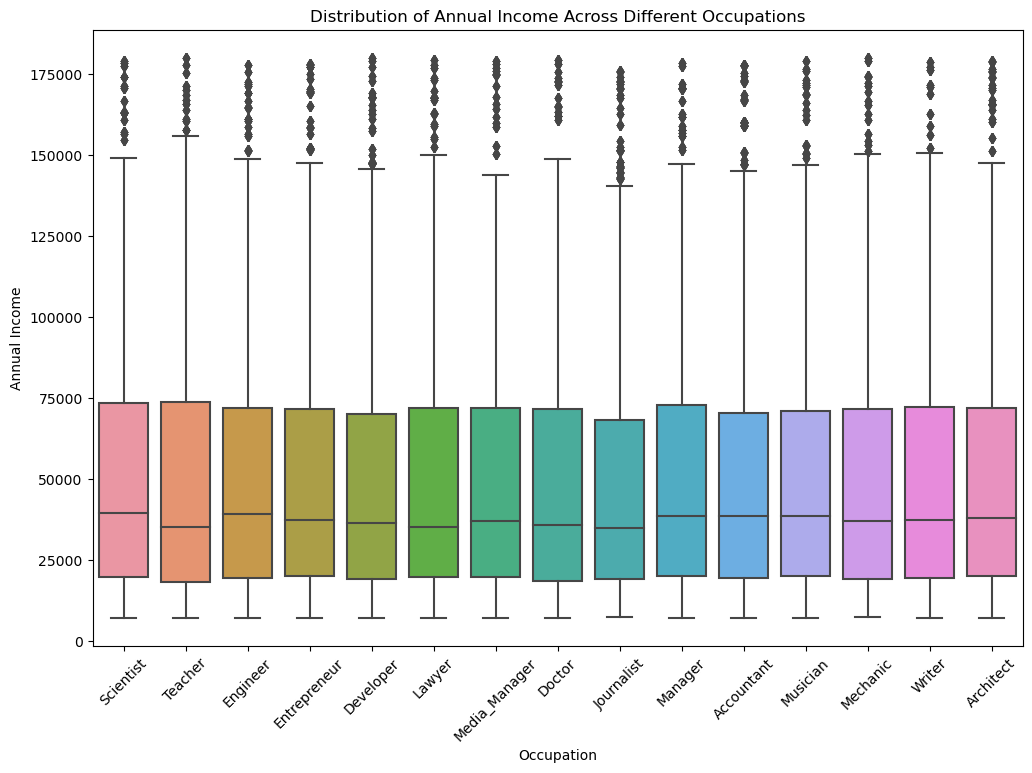

In [30]:
# Chart - 1 visualization code
# Example: Distribution of Annual Income
sns.histplot(df['Annual_Income'])
plt.title('Distribution of Annual Income')
plt.show()

# Example: Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Occupation', y='Monthly_Inhand_Salary', data=df)
plt.xticks(rotation=45)
plt.title('chart of Monthly Inhand Salary by Occupation')
plt.show()

# Create a box plot for Annual Income across Occupation
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Annual_Income', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of Annual Income Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Annual Income')
plt.show()

#### Chart - 2  visualize the average Annual_Income by Occupation.

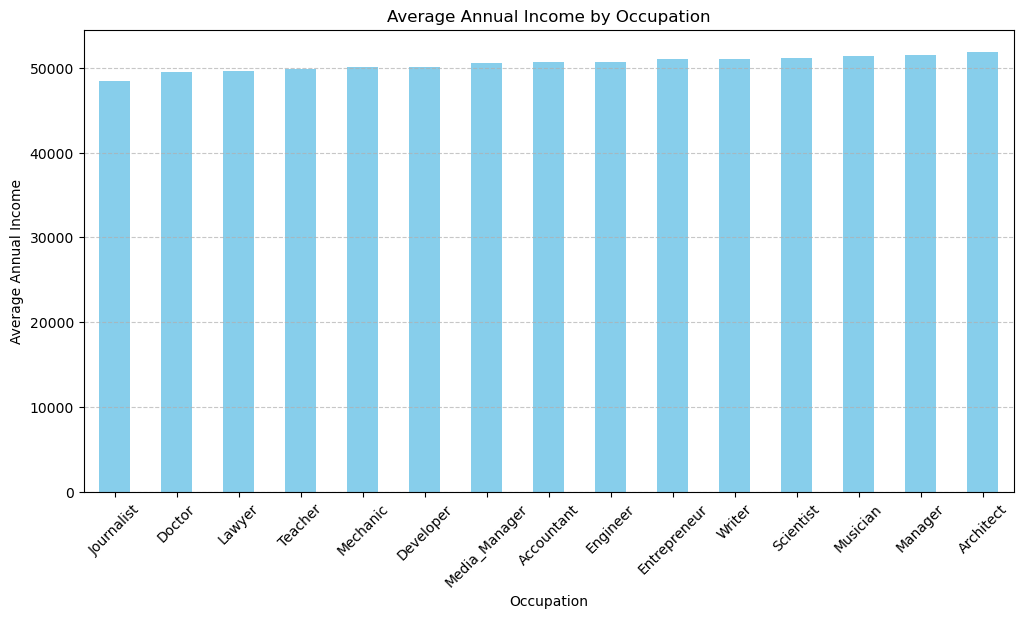

In [41]:
# Chart - 2 visualization code
# Ensure df is not empty before proceeding
if not df.empty:
    # Calculate average Annual_Income by Occupation
    avg_income_by_occupation = df.groupby('Occupation')['Annual_Income'].mean().sort_values()

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    avg_income_by_occupation.plot(kind='bar', color='skyblue')
    plt.title('Average Annual Income by Occupation')
    plt.xlabel('Occupation')
    plt.ylabel('Average Annual Income')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("The DataFrame is empty. Please check your data loading or processing.")

#### Chart - 3  Correlation Matrix of Income, Loans, and Debts (Heatmap)

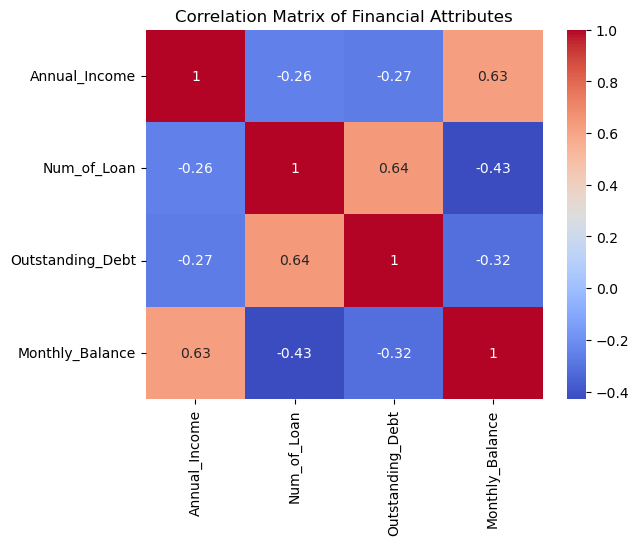

In [31]:
# Chart - 3 visualization code
selected_columns = ['Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']
corr_matrix = df[selected_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Financial Attributes')
plt.show()


#### Chart - 4  Explore the relationship between Age, Annual Income, Monthly Balance, and Outstanding Debt. Highlight the data points by Credit Score to see if there is any noticeable pattern.

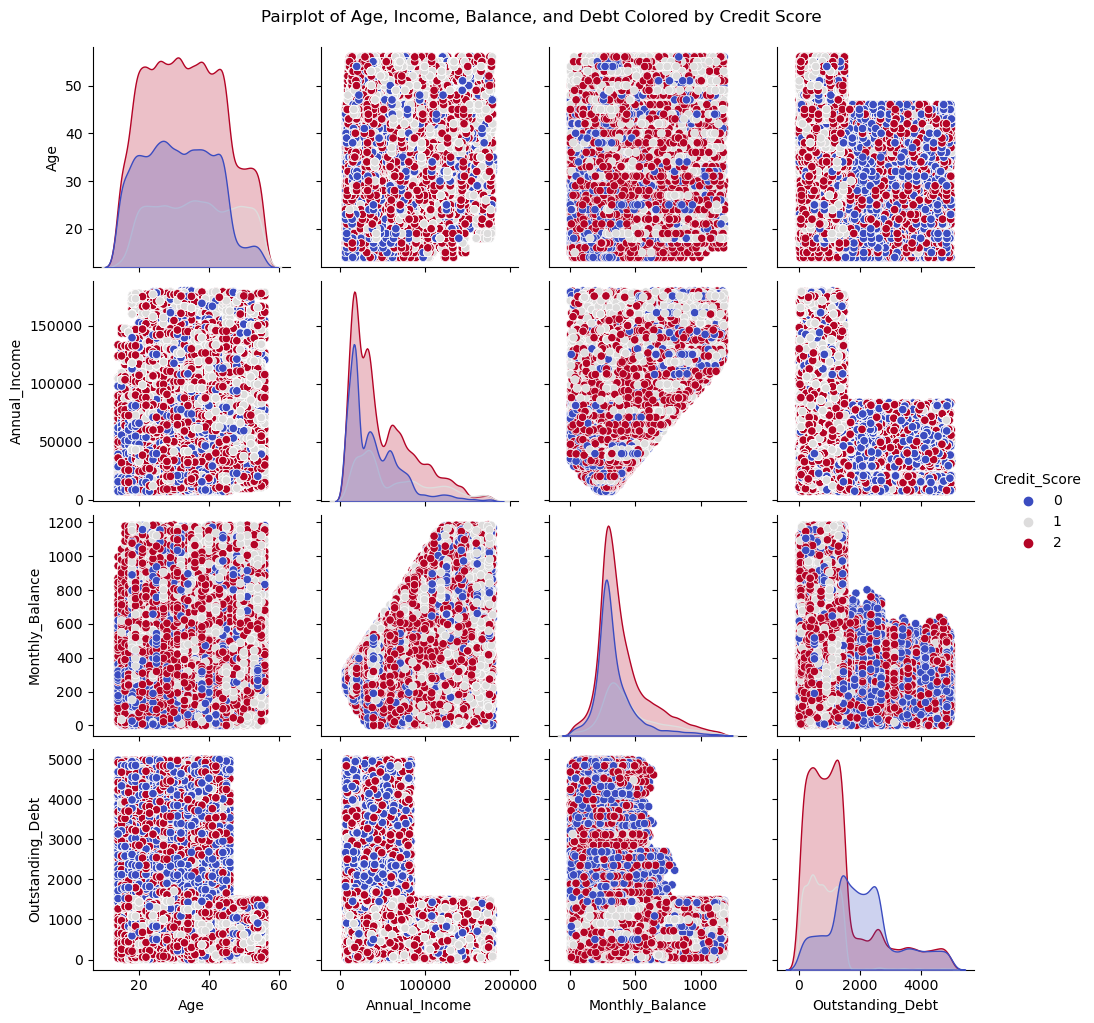

In [63]:
# Chart - 4 visualization code
# Select columns of interest for the pairplot
cols_of_interest = ['Age', 'Annual_Income', 'Monthly_Balance', 'Outstanding_Debt', 'Credit_Score']

# Create a pairplot with hue based on Credit Score
sns.pairplot(df[cols_of_interest], hue='Credit_Score', palette='coolwarm')
plt.suptitle('Pairplot of Age, Income, Balance, and Debt Colored by Credit Score', y=1.02)
plt.show()

#### Chart - 5

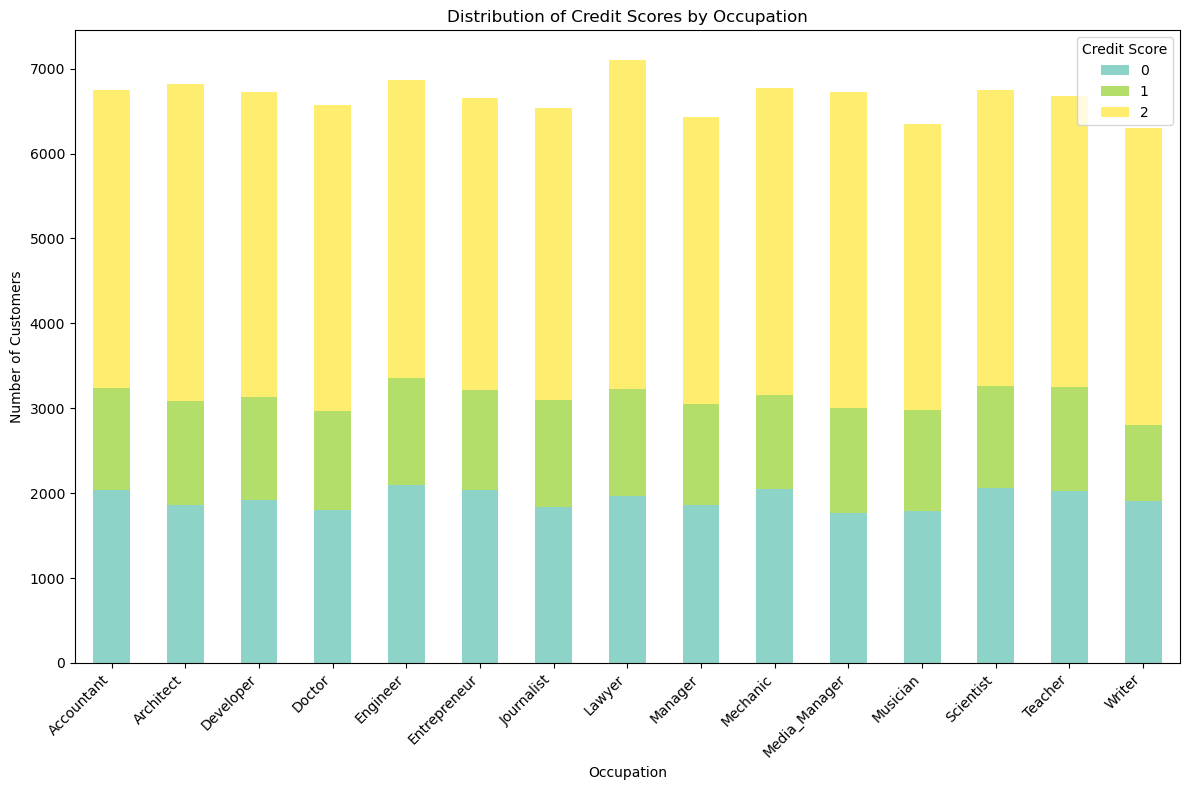

In [65]:
# Chart - 5 visualization code
# Count the occurrences of each credit score per occupation

# Ensure df is not empty and contains the necessary columns
if not df.empty and 'Occupation' in df.columns and 'Credit_Score' in df.columns:
    occupation_credit_score = df.groupby(['Occupation', 'Credit_Score']).size().unstack(fill_value=0)

    # Check if occupation_credit_score has any numeric data
    if not occupation_credit_score.empty:
        # Plot a stacked bar chart
        occupation_credit_score.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')

        # Add labels and title
        plt.title('Distribution of Credit Scores by Occupation')
        plt.xlabel('Occupation')
        plt.ylabel('Number of Customers')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Credit Score', loc='upper right')
        plt.tight_layout()

        # Show the chart
        plt.show()
    else:
        print("No data available for plotting after grouping.")
else:
    print("Original DataFrame is empty or missing required columns.")

#### Chart - 6

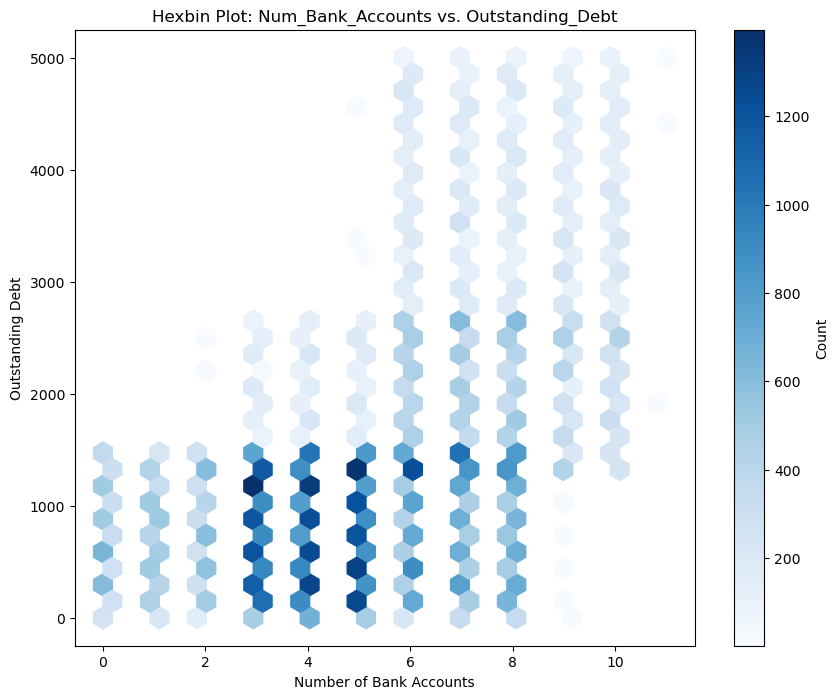

In [66]:
# Chart - 6 visualization code
import matplotlib.pyplot as plt

# Create a hexbin plot to visualize the relationship between Num_Bank_Accounts and Outstanding_Debt
plt.figure(figsize=(10, 8))
plt.hexbin(df['Num_Bank_Accounts'], df['Outstanding_Debt'], gridsize=30, cmap='Blues', mincnt=1)

# Add color bar and labels
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Num_Bank_Accounts vs. Outstanding_Debt')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Outstanding Debt')

plt.show()


# **Conclusion**


The project successfully identified key areas of risk and potential fraud indicators within the customer base. By combining data wrangling, exploratory data analysis, and advanced visualizations, we were able to highlight patterns that can be further investigated to develop fraud detection systems. Moving forward, machine learning algorithms can be employed to automate and improve the accuracy of fraud detection based on the features identified in this analysis.

